In [5]:
# 경고무시
import warnings
warnings.filterwarnings(action  = 'ignore')

# 11번가

## 최종 11번가 크롤링 코드
- 약 1분정도 소요

In [3]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup
street11 = pd.DataFrame(columns = ['BigCate','SmallCate','Name'])
big_category = {'간편식/냉장/냉동': '1001341',
 '가공식품': '1001338',
 '김치': '1058375',
 '과자/간식': '1001340',
 '축산': '1001336',
 '수산': '1001335',
 '채소': '1129477',
 '반찬/젓갈': '1001337',
 '다이어트식품': '1001343',
 '전통식품': '1141766'}

# 대분류 돌면서
for big_key, big_val in big_category.items():
  #소분류 가져오고
  URL = f'https://shop.11st.co.kr/stores/315553/category?isCategory=true&categoryType=DISPLAY&dispCtgrNo={big_val}&largeCtgrNo={big_val}&pageNo=1'
  response = requests.get(URL)
  soup = BeautifulSoup(response.text, 'html.parser')
  cate_tags = soup.select('.category_item')

  small_category = {} # 빈딕셔너리
  for cate in cate_tags:
    temp = cate.find('a')['onclick']
    temp = re.search('\(.*\)',temp)
    temp = temp.group() #('1001341', 'L', 'DISPLAY')
    if temp[13]== 'M' : #소분류이면
      small_category[cate.text.strip()]= temp[2:9]
  #소분류 돌면서
  for key, val in small_category.items():
    page = 1
    while 1:
      URL  = f'https://shop.11st.co.kr/stores/315553/category?isCategory=true&categoryType=DISPLAY&dispCtgrNo={val}&largeCtgrNo={big_val}&middleCtgrNo={val}&pageNo={page}'
      response = requests.get(URL)
      soup = BeautifulSoup(response.text, 'html.parser')

      # 상품 태그들 가져오고
      name_tags= soup.select('.store_product_item a .store_product_info .store_product_name')
      for name in name_tags :
        new_data = {'BigCate' : big_key,  'SmallCate' : key,    'Name' : name.text.strip()}
        street11 = street11.append(new_data, ignore_index = True)
      if len(name_tags)<30:
        break
      page+=1


In [4]:
street11

,BigCate,SmallCate,Name
0,간편식/냉장/냉동,냉장/냉동식품 기타,더건강한닭가슴살 큐브톡톡 ALL 96g(10+10)
1,간편식/냉장/냉동,냉장/냉동식품 기타,[CJ제일제당]비비고 냉동면 잡채/칼국수/짜장/짬뽕 외 골라담기
2,간편식/냉장/냉동,냉장/냉동식품 기타,[CJ제일제당] 고메 냉장 함박/미트볼/비비고 한입떡갈비 최대 5+5 골라담기
3,간편식/냉장/냉동,냉장/냉동식품 기타,[CJ]행복한콩 모닝두부 플레인 140g
4,간편식/냉장/냉동,냉장/냉동식품 기타,[CJ제일제당] 고메 오리지널 핫도그 400g
...,...,...,...
569,다이어트식품,다이어트차/음료,밸런스밀 프로틴쉐이크 카카오 50g
570,다이어트식품,다이어트차/음료,밸런스밀 귀리 50g
571,다이어트식품,다이어트차/음료,밸런스밀 고구마 50g
572,전통식품,전통떡/과자,[CJ제일제당] 즐거운동행 미정당 방앗간참쌀떡국떡 400g


### 정규표현식 - 대괄호 없애기
- 이벤트성 문구가 대괄호로 넣어져 있기 때문

In [5]:
#대괄호 없애기
street11['Re_Name']=street11['Name'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))
df= street11
df

,BigCate,SmallCate,Name,Re_Name
0,간편식/냉장/냉동,냉장/냉동식품 기타,더건강한닭가슴살 큐브톡톡 ALL 96g(10+10),더건강한닭가슴살 큐브톡톡 ALL 96g(10+10)
1,간편식/냉장/냉동,냉장/냉동식품 기타,[CJ제일제당]비비고 냉동면 잡채/칼국수/짜장/짬뽕 외 골라담기,비비고 냉동면 잡채/칼국수/짜장/짬뽕 외 골라담기
2,간편식/냉장/냉동,냉장/냉동식품 기타,[CJ제일제당] 고메 냉장 함박/미트볼/비비고 한입떡갈비 최대 5+5 골라담기,고메 냉장 함박/미트볼/비비고 한입떡갈비 최대 5+5 골라담기
3,간편식/냉장/냉동,냉장/냉동식품 기타,[CJ]행복한콩 모닝두부 플레인 140g,행복한콩 모닝두부 플레인 140g
4,간편식/냉장/냉동,냉장/냉동식품 기타,[CJ제일제당] 고메 오리지널 핫도그 400g,고메 오리지널 핫도그 400g
...,...,...,...,...
569,다이어트식품,다이어트차/음료,밸런스밀 프로틴쉐이크 카카오 50g,밸런스밀 프로틴쉐이크 카카오 50g
570,다이어트식품,다이어트차/음료,밸런스밀 귀리 50g,밸런스밀 귀리 50g
571,다이어트식품,다이어트차/음료,밸런스밀 고구마 50g,밸런스밀 고구마 50g
572,전통식품,전통떡/과자,[CJ제일제당] 즐거운동행 미정당 방앗간참쌀떡국떡 400g,즐거운동행 미정당 방앗간참쌀떡국떡 400g


## 주어진 데이터를 카테고리화 시키기

### 정규표현식 - 대괄호 없애기

In [7]:
import pandas as pd
street0 = pd.read_excel('/content/2305_11번가장바구니data1.xlsx', sheet_name =0 )
street1 = pd.read_excel('/content/2305_11번가장바구니data1.xlsx', sheet_name =1 )
street2 = pd.read_excel('/content/2305_11번가장바구니data1.xlsx', sheet_name =2 )
street3 = pd.read_excel('/content/2305_11번가장바구니data1.xlsx', sheet_name =3 )
street4 = pd.read_excel('/content/2305_11번가장바구니data1.xlsx', sheet_name =4 )

street0['Re_Name']=street0['상품명'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))
street1['Re_Name']=street1['상품명'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))
street2['Re_Name']=street2['상품명'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))
street3['Re_Name']=street3['상품명'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))
street4['Re_Name']=street4['상품명'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))
street = pd.concat([street0, street1, street2, street3, street4])
street = street.reset_index(drop= True)

### 분류하기
- 1) 크롤링한 자료로 1차 분류
- 2) 분류 안된 상품들 보고 2차 분류
- 3) 수작업으로 마무리

In [8]:
# 분류 안된 상품명 개수 확인 코드
street['Big_cate']=''
street11=street
need_set = set(street11[street11.Big_cate==''].Re_Name)
print(len(need_set))

262


In [9]:
for idx, item in enumerate(street.Re_Name) :
    for num, name in enumerate(df.Re_Name) :
        if str(item) in str(name):
           street['Big_cate'][idx]= df['BigCate'][num]

In [10]:
for idx, item in enumerate(street11.Re_Name):
    if '고메' in str(item) or '핫도그' in str(item):
      street['Big_cate'][idx]= '간편식/냉장/냉동'

    if '비비고' in str(item) and '구이' in str(item):
      street['Big_cate'][idx]= '간편식/냉장/냉동'

    if '김치' in str(item):
      street['Big_cate'][idx]= '김치'

    if '다담 'in str(item) or '양념' in str(item):
      street['Big_cate'][idx]= '가공식품'

    if '삼호' in str(item):
      street['Big_cate'][idx]= '가공식품'

    if '백설'in str(item) and '믹스' in str(item):
      street['Big_cate'][idx]= '가공식품'

    if '맥스봉' in str(item) or '쁘띠첼' in str(item):
      street['Big_cate'][idx]='과자/간식'

    if '닭가슴살' in str(item):
      street['Big_cate'][idx]='축산'

    if '비비고' in str(item) and '국'in str(item):
      street['Big_cate'][idx]='간편식/냉장/냉동'

    if '비비고' in str(item) and '찌개'in str(item):
      street['Big_cate'][idx]='간편식/냉장/냉동'

    if '비비고' in str(item) and '탕'in str(item):
      street['Big_cate'][idx]='간편식/냉장/냉동'

    if '밥' in str(item) or '햇반' in str(item) or '교자' in str(item):
      street['Big_cate'][idx]='간편식/냉장/냉동'

    if '천일염' in str(item) :
      street['Big_cate'][idx]= '가공식품'

    if '다시다' in str(item) :
      street['Big_cate'][idx]='과자/간식'

    if '된장' in str(item) or '쌈장' in str(item):
      street['Big_cate'][idx]='가공식품'


In [11]:
# 저장하기
street.to_csv("street.csv", index=False, encoding="utf-8-sig")
# 이후 빈칸은 수작업으로 채워줬습니다.

# Naver

## 최종 네이버 크롤링 코드

In [24]:
from bs4.element import NavigableString
import re
import requests
from bs4 import BeautifulSoup
naver = pd.DataFrame(columns = ['BigCate','Name'])
naver_big_category = {'밥/죽/면': ['013720d98aa54bda98fabbdafda20cd1', '0bf56467342e49209cf1ab910c9c94f3','19ea146d18614e91bbadf6a3b3bc7be7',
                                'e14ab86a9c6340fa8f303c6ba4b1d5a7','a3488541b6c2446796d89f45b7670af8','3e1a70f43fe2428d96194964e492a12d','1d9eddacfad54307b0fa2b3110cdd7d6'],
  '국/김치/반': ['7aeda0c779e34e1a86f4848f723cd637', 'b4efb2d3dbca4cd39c02ebeaae6d7cc8','f01df9a6c2124a5d8b319c21761519f9','c3760949961f4112af431ba0e3ddf7db'
  '45ec1d889b764324b21ecc99baba0c4d', '973aaacb0fc5402faa4ad3edf44d4e4b','d04ecc23b5de4deeb8185007ea5de1a3'],
 '만두/치킨,피자/중화': ['c01f7e3ff4b84a19a373e5508e5e07e8','8cdf01e95d0343239681df36d991c986','0a7c29b56f614c01ad18e646bcc1b670','57c7f4d197aa4e8a8aae8ea8f3216b30','3a6fdd15e5404db582a0b11513be303b'],
 '돈까스/함박/구이': ['7b533b3147fa4b70940de3cc0693391a','f4817ad308c648f2aaa0ba07271b1afb','73f9eedaf4a24a72a5d8103a31a53a8b','6e567583f82e4428a17923d85e85594a'],
 '햄':['ef027e31a2e04bcd8dc0878aa98a3a0f','03b36f3b8d054eb6b72e5fa183269b8d','82e979e4fd914f2eba1a5621b7959fa2','97348e30e6cf4163bb344f110f1564a2'],
'간식/음료': ['4179b055c4554f23b3dd74410e17c01e','c49e76df39d84d9482a1fa63fe8d03e1','a18762ed46f54031b696589bcc6dae39'],
'양념/가루/오일':['9a021f8f9d464fcbb8a87b6e72d08eaf','a5f2b23a26ea42a28f0a92cdb2bb3c38','bd2c20438e184a3b83b66f2125d82731','bce75e0d88f54adaa395cd2b356a97a7'
,'9bd43369c2a240d3b5b9233bce133b5b','e7520ea6fe73414e8ecb76be5e526a53','3585a3f15b9c491d92dd51c5504674fa','3dc08261293c4243a51c146be043e679','5ea65484426a43998ddca954d65ba744']
 }

 # 대분류 돌면서
for big_key, big_val in naver_big_category.items():
  for sub_val in big_val:
    URL = f'https://brand.naver.com/cheiljedang/category/{sub_val}'
    params = {"st":"POPULAR", 'dt':'IMAGE', 'page':'1', 'size':"80"}
    head = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"}
    response = requests.get(URL, params = params)
    soup = BeautifulSoup(response.text, 'html.parser')
    name_tags = soup.select('.ZdiAiTrQWZ._1BDRwBQfa1.SQUARE.t52c8ixKbX')
    for tag in name_tags:
      name= tag.select_one('div a ._3pA0Duwrhw').text # 상품명
      new_data = {'BigCate' : big_key,  'Name' : name.strip()}
      naver = naver.append(new_data, ignore_index = True)

### 정규표현식 - 대괄호 없애기

In [26]:
#대괄호 없애기
naver['Re_Name']=naver['Name'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))
df= naver
df

,BigCate,Name,Re_Name
0,밥/죽/면,햇반 210Gx36개,햇반 210Gx36개
1,밥/죽/면,햇반 210G 24개,햇반 210G 24개
2,밥/죽/면,햇반 작은공기130Gx36개,햇반 작은공기130Gx36개
3,밥/죽/면,햇반 매일잡곡밥 210Gx36개,햇반 매일잡곡밥 210Gx36개
4,밥/죽/면,햇반 발아현미밥 210Gx36개,햇반 발아현미밥 210Gx36개
...,...,...,...
957,양념/가루/오일,CJ 오곡참깨 드레싱 240Gx1개,CJ 오곡참깨 드레싱 240Gx1개
958,양념/가루/오일,백설 토마토스파게티소스 610Gx2개,백설 토마토스파게티소스 610Gx2개
959,양념/가루/오일,CJ 오리엔탈 드레싱 105G,CJ 오리엔탈 드레싱 105G
960,양념/가루/오일,CJ 오곡참깨 드레싱 105Gx1개,CJ 오곡참깨 드레싱 105Gx1개


## 주어진 데이터를 카테고리화 시키기

In [13]:
import pandas as pd
naver0 = pd.read_excel('/content/2305_네이버외부몰data2.xlsx', sheet_name =0 )
naver1 = pd.read_excel('/content/2305_네이버외부몰data2.xlsx', sheet_name =1 )
naver2 = pd.read_excel('/content/2305_네이버외부몰data2.xlsx', sheet_name =2 )
naver3 = pd.read_excel('/content/2305_네이버외부몰data2.xlsx', sheet_name =3 )
naver4 = pd.read_excel('/content/2305_네이버외부몰data2.xlsx', sheet_name =4 )

naver0['Re_Name']=naver0['상품명'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))
naver1['Re_Name']=naver1['상품명'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))
naver2['Re_Name']=naver2['상품명'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))
naver3['Re_Name']=naver3['상품명'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))
naver4['Re_Name']=naver4['상품명'].map(lambda x:re.sub('\[[^)]+\]', '', str(x)))


In [27]:
naver_total = pd.concat([naver0, naver1, naver2, naver3, naver4])
naver_total = naver_total.reset_index(drop= True)
naver_total

,자사주문번호,거래처,주문일,사은품여부,출고예정일,주문/배송상태,클레임 상태,운송장등록일자,상품순번,상품명,...,상품타입,매출액,자재명,초기자재수량,주문수량,취소수량,반품수량,배송유형,마감구분,Re_Name
0,43262630621945109,외부몰_직거래_네이버(신),20230530,N,20230622,배송 완료,-,2023-06-21 15:09:02,1,스팸클래식 200Gx10개,...,일반,19900,스팸 클래식 200G/상온,10,10,0,0,택배배송,상온,스팸클래식 200Gx10개
1,43262630621945108,외부몰_직거래_네이버(신),20230530,N,20230622,배송 완료,-,2023-06-21 15:09:02,1,비비고 사골곰탕 500Gx18개,...,일반,14300,비비고/사골곰탕 500G_18입/상온,18,18,0,0,택배배송,상온,비비고 사골곰탕 500Gx18개
2,43262630606618841,외부몰_직거래_네이버(신),20230530,N,20230607,배송 완료,-,2023-06-07 10:31:59,1,스팸클래식 200Gx10개,...,일반,18900,스팸 클래식 200G/상온,10,10,0,0,택배배송,풀필먼트(상온),스팸클래식 200Gx10개
3,43262630606617755,외부몰_직거래_네이버(신),20230530,N,20230607,배송 완료,-,2023-06-07 10:31:17,1,스팸클래식 200Gx10개,...,일반,19900,스팸 클래식 200G/상온,10,10,0,0,택배배송,풀필먼트(상온),스팸클래식 200Gx10개
4,43262630606617754,외부몰_직거래_네이버(신),20230530,N,20230607,배송 완료,-,2023-06-07 10:31:59,1,스팸클래식 200Gx10개,...,일반,19900,스팸 클래식 200G/상온,10,10,0,0,택배배송,풀필먼트(상온),스팸클래식 200Gx10개
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152453,43262630501948198,외부몰_직거래_네이버(신),20230501,N,20230502,배송 완료,-,2023-05-01 11:30:04,1,[복합_마켓전략] 햇반 컵반 한끼간편세트B (인기메뉴 5종 2개씩 총 10개),...,일반,5780,햇반/컵반 치킨마요덮밥 233G/상온,2,2,0,0,네이버위탁,풀필먼트(상온),햇반 컵반 한끼간편세트B (인기메뉴 5종 2개씩 총 10개)
152454,43262630501948198,외부몰_직거래_네이버(신),20230501,N,20230502,배송 완료,-,2023-05-01 11:30:04,1,[복합_마켓전략] 햇반 컵반 한끼간편세트B (인기메뉴 5종 2개씩 총 10개),...,일반,5780,햇반/컵반 스팸김치덮밥251G(18입)/상온,2,2,0,0,네이버위탁,풀필먼트(상온),햇반 컵반 한끼간편세트B (인기메뉴 5종 2개씩 총 10개)
152455,43262630501948198,외부몰_직거래_네이버(신),20230501,N,20230502,배송 완료,-,2023-05-01 11:30:04,1,[복합_마켓전략] 햇반 컵반 한끼간편세트B (인기메뉴 5종 2개씩 총 10개),...,일반,5780,햇반/컵반강된장보리비빔밥280G(칼로스)/상,2,2,0,0,네이버위탁,풀필먼트(상온),햇반 컵반 한끼간편세트B (인기메뉴 5종 2개씩 총 10개)
152456,43262630501948198,외부몰_직거래_네이버(신),20230501,N,20230502,배송 완료,-,2023-05-01 11:30:04,1,[복합_마켓전략] 햇반 컵반 한끼간편세트B (인기메뉴 5종 2개씩 총 10개),...,일반,5780,햇반/컵반철판제육덮밥256G(칼로스)/상온,2,2,0,0,네이버위탁,풀필먼트(상온),햇반 컵반 한끼간편세트B (인기메뉴 5종 2개씩 총 10개)


In [ ]:
naver_total['Big_cate']=''

### 분류하기
- 1) 크롤링한 자료로 1차 분류
- 2) 분류 안된 상품들 보고 2차 분류
- 3) 수작업으로 마무리

In [36]:
for idx, item in enumerate(naver_total.Re_Name) :
    for num, name in enumerate(df.Re_Name) :
        if str(item) in str(name) or str(name) in str(item) :
          naver_total['Big_cate'][idx]= df['BigCate'][num]

In [37]:
for idx, item in enumerate(naver_total.Re_Name):
  if naver_total['Big_cate'][idx]=='':
      if '햇반' in str(item) or '주먹밥' in str(item) or '볶음밥' in str(item) or '떡국떡' in str(item) or '스파게티' in str(item):
        naver_total['Big_cate'][idx]= '밥/죽/면'

      elif  '김치' in str(item) or '조림' in str(item) or '삼계탕' in str(item):
        naver_total['Big_cate'][idx]= '국/김치/반찬'

      elif '만두' in str(item) or  '교자' in str(item):
        naver_total['Big_cate'][idx]= '만두/치킨,피자/중화'

      elif '치킨' in str(item) or  '피자' in str(item) or '중화' in str(item)  :
        naver_total['Big_cate'][idx]= '만두/치킨,피자/중화'

      elif '돈까스' in str(item) or '함박' in str(item) or '동그랑' in str(item) or '떡갈비' in str(item):
        naver_total['Big_cate'][idx]= '돈까스/함박/구이'

      elif '스팸' in str(item) or '햄' in str(item) or '베이컨' in str(item) or '소시지' in str(item) or '닭가슴살' in str(item) or '비엔나' in str(item):
        naver_total['Big_cate'][idx]= '햄'

      elif '맥스'in str(item) or '핫바' in str(item) or '핫도그' in str(item) or '떡볶이' in str(item) or '맛밤' in str(item) or '쁘띠' in str(item):
        naver_total['Big_cate'][idx]= '간식/음료'

      elif '다담' in str(item) or '다시다' in str(item) or '산들애' in str(item) or '된장' in str(item) or '쌈장' in str(item) or '고추장' in str(item)or '밀가루' in str(item):
        naver_total['Big_cate'][idx]='양념/가루/오일'

      elif '다담' in str(item) or '설탕' in str(item) or '소금' in str(item) or '맛술' in str(item) or '식초' in str(item) or '액젓' in str(item)or '식용유' in str(item):
        naver_total['Big_cate'][idx]='양념/가루/오일'

      elif '참기' in str(item) or '소스' in str(item) or '드레싱' in str(item):
        naver_total['Big_cate'][idx]='양념/가루/오일'

In [38]:
for idx, item in enumerate(naver_total.Re_Name):
  if naver_total['Big_cate'][idx]=='':
      if '고등어' in str(item) or '삼치' in str(item) or '가자미' in str(item)   or '갈치' in str(item) or '한식간장김' in str(item)  or '임연수' in str(item):
        naver_total['Big_cate'][idx]= '국/김치/반찬'

      elif  '곰탕' in str(item) or '설렁탕'in str(item) or '갈비탕' in str(item) or '삼호' in str(item) or '깍두기' in str(item) or '명가' in str(item):
        naver_total['Big_cate'][idx]= '국/김치/반찬'

      elif '미역국' in str(item) or  '잡채' in str(item) or  '육개장' in str(item) or '황태국' in str(item) or '감자탕' in str(item) or '행복한콩' in str(item) :
        naver_total['Big_cate'][idx]= '국/김치/반찬'

      elif '곤약밥' in str(item) or '잡채' in str(item) or '냉면' in str(item) or '죽'in str(item) or '우동'in str(item) or '소바'in str(item) or '파스타' in str(item) or '칼국수' in str(item):
        naver_total['Big_cate'][idx]= '밥/죽/면'

      elif '돈카츠' in str(item) or '바싹' in str(item) or '탕수육' in str(item) or '떡갈비' in str(item) or '쉐프솔루션' in str(item):
        naver_total['Big_cate'][idx]= '돈까스/함박/구이'

      elif '육공육' in str(item) or '후랑크' in str(item):
        naver_total['Big_cate'][idx]= '햄'

      elif '얼티브'in str(item) or '밸런스' in str(item) or '믹스' in str(item) or '베이커리' in str(item) or '청' in str(item) or 'EXCYCLE' in str(item) :
        naver_total['Big_cate'][idx]= '간식/음료'

      elif '부침가루' in str(item) or '밥이랑' in str(item) :
         naver_total['Big_cate'][idx]='양념/가루/오일'

      elif '올리브유' in str(item) or '카놀라유' in str(item) or '포도씨유' in str(item) or '양념' in str(item) or '육수' in str(item):
        naver_total['Big_cate'][idx]='양념/가루/오일'




## 수작업 처리

In [39]:
#밥/죽/면
a = [' 밀당의고수 쫄면 4인','고메 프리미엄 차돌마라탕면 2인분x2개','플랜테이블 할라피뇨 그레인보울 160Gx3개','순두부찌개국밥 173G x7개',
 ' 밀당의고수쫄면 2인',' 백설 중면 900G',' 베트남 쌀국수 2인분 375G',]
#국/김치/반찬
b= [ ' 4無 치자이절단무지 400g',' 비비고 무말랭이무침110g','04.비비고 소고기무국 500Gx6개',
 ' 비비고 소고기장터국 500g',' 하선정 다진마늘 250G','고메 알싸쯔란봉 355Gx3개','비비고 남도식 추어탕 460Gx5개',
 '비비고 묵은지 1.5kg','하선정 장아찌 1KGx1개', '비비고 곤드레나물밥433g',
 '비비고 핑계고 생선구이 샘플러 SET','쿡킷 구운소불고기전골 610G(2인)','주부초밥왕 새콤달콤 도시락기획280G',
 '쿡킷 스페인식감바스 315G(2인)','신비비고 도톰해물완자 795G','순살생선구이 2종 구성',
 ' 비비고 순댓국460G',
 ' 비비고 추어탕 460g', ]
#만두/치킨,피자/중화
c= [' 고메 토마토미트볼 147G','CJ 꼬마새우까스 250Gx4개','고메 스윗치즈2판+토마토치즈2판+갈릭치즈2판','고메 토마토미트볼147GX10개','플랜테이블 토마토미트볼 165Gx10개','소보로 고르곤졸라x3개',
 'CJ 숯불향닭강정 200G', ]
#돈까스/함박/구이
d= [' 뉴알떡스테이크 1.4KG',' 백설 너비아니 560g',' 크레잇 직화 두툼너비아니1.08kg','고메 화끈불닭봉 355Gx3개', '크레잇 로스트 핫봉 1KG',
 '크레잇 바베큐치즈핫랩 175Gx3개','백설 구이한판 60Gx3개',

 '크레잇 블랙페퍼폭찹 스테이크 300Gx3개',
 '크레잇 유연한소불고기 500Gx2개',
 '크레잇 트러플맥앤치즈핫랩175Gx3개',]
#햄
e= ['The더건강한 오리지널 부어스트 260g*2',]
#간식/음료
f = [' 그레인보울x아몬드브리즈', ' 미정당 쫄볶이 470G' ,' 밀당의고수 김말이 400gX3개',' 바삭한입김말이 1KG', ' 핫케익가루 1kg','맛군밤 60Gx12개 (4번들x3개)',
 '메티에 마스카포네치즈파우더 1kg', '크레잇 바삭통김말이 1.4KGx2개',
 '바삭통김말이1.4Kg',]
#양념/가루/오일
g = [' 100% 통들깨 들기름 160ml', ' 대용량 요리당 2.45kg', ' 리치카라멜향시럽 700ML', ' 리치헤이즐넛향시럽 700ML', ' 만능요리 파기름 220MLx4개',' 백설 물엿 1.2kg',
 ' 백설 쌀엿 1.2KG','해찬들 찍장 오리지널 300Gx2개',
 ' 백설 아이미2kg',
 ' 백설 옥수수유 900mlX6개', ' 백설 프락토 올리고당 2.45kg',' 쌀엿 700G',
 ' 요리당 1.2kg',' 해찬들 사과듬뿍 비빔장 470g',
 ' 허브맛솔트순한맛 50g','만능요리 파기름 220ml','백설 바삭한 요리유 900MLx3병',
 '백설 빵가루 1kg','백설 100+만능요리 파기름 220MLx5개',
 '백설 감자수제비가루 500G',
 '백설 스테이크 솔트&시즈닝 40Gx2개',
 '백설 요리올리고당1.2KGx2개',
 '백설 참치액 순더깔끔한맛 500G',
 '백설 참치액 진더풍부한맛 500G','비비고테이블냉동국물세트리플렛',
 '백설 통손질국물내기 국내산멸치디포리 10gX6개입',
 '백설 통손질국물내기 얼큰해물 10gX6개입',
 '백설 프락토 올리고당 700g',
 '백설 해바라기유 스프레이 200MLx2개','콩기름9L',


     ]


for idx, item in enumerate(naver_total.Re_Name):
    if item in a :
      naver_total['Big_cate'][idx]= '밥/죽/면'

    elif naver_total['Re_Name'][idx] in b :
      naver_total['Big_cate'][idx]= '국/김치/반찬'

    elif naver_total['Re_Name'][idx] in c :
      naver_total['Big_cate'][idx]= '만두/치킨,피자/중화'

    elif naver_total['Re_Name'][idx] in d :
      naver_total['Big_cate'][idx]= '돈까스/함박/구이'

    elif naver_total['Re_Name'][idx] in e :
      naver_total['Big_cate'][idx]= '햄'

    elif naver_total['Re_Name'][idx] in f :
      naver_total['Big_cate'][idx]= '간식/음료'

    elif naver_total['Re_Name'][idx] in g :
      naver_total['Big_cate'][idx]= '양념/가루/오일'
    elif naver_total['Re_Name'][idx] == '비비고테이블 부직포 가방' :
      naver_total['Big_cate'][idx]= '기타'






# 카테고리 분석

In [46]:
street.to_csv("street_final.csv", index=False, encoding="utf-8-sig")
naver_total.to_csv("naver_final.csv", index=False, encoding="utf-8-sig")

## 그래프 한글깨짐 이슈처리

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

fc-cache: succeeded


In [7]:
plt.rc('font', family='NanumBarunGothic')

In [2]:
# 한글깨짐 처리
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False
if platform.system()=='Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family = font_name)
else :
    print("")

## 결과 확인

In [3]:
# 11번가 데이터
import pandas as pd
df1 = pd.read_csv('/content/street_final.csv')
df11 = df1['Big_cate'].value_counts()
df11

간편식/냉장/냉동    673
가공식품         551
김치           125
과자/간식         50
축산            37
전통식품           1
Name: Big_cate, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, '간편식/냉장/냉동'),
  Text(1, 0, '가공식품'),
  Text(2, 0, '김치'),
  Text(3, 0, '과자/간식'),
  Text(4, 0, '축산'),
  Text(5, 0, '전통식품')])

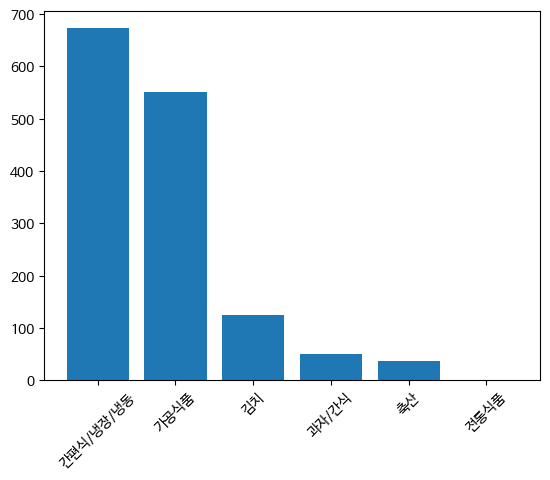

In [8]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(df11.index,df11)
plt.xticks( rotation=45)
plt.xticks()

In [10]:
df2 = pd.read_csv('/content/naver_final.csv')
df22 = df2['Big_cate'].value_counts()
df22

밥/죽/면          83235
국/김치/반찬        19170
햄              13844
만두/치킨,피자/중화    11535
양념/가루/오일        9930
국/김치/반          8207
간식/음료           4642
돈까스/함박/구이       1888
기타                 5
Name: Big_cate, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, '밥/죽/면'),
  Text(1, 0, '국/김치/반찬'),
  Text(2, 0, '햄'),
  Text(3, 0, '만두/치킨,피자/중화'),
  Text(4, 0, '양념/가루/오일'),
  Text(5, 0, '국/김치/반'),
  Text(6, 0, '간식/음료'),
  Text(7, 0, '돈까스/함박/구이'),
  Text(8, 0, '기타')])

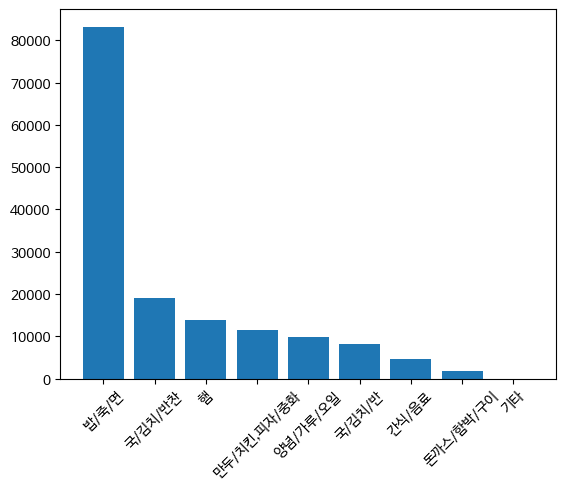

In [11]:
plt.bar(df22.index,df22)
plt.xticks( rotation=45)
plt.xticks()